# Intro to Linear Regression

### Table of Contents

1. [Linear regression "by hand"](#1.-Linear-regression-"by-hand")
2. [Exercise: estimating coefficients for linear regression](#2.-Exercise:-estimating-coefficients-for-linear-regression)
3. [Calculating $R^2$ and root mean squared error (RMSE)](#3.-Calculating-$R^2$-and-root-mean-squared-error-(RMSE))
4. [Exercise: evaluate our first model](#4.-Exercise:-evaluate-our-first-model)
5. [Exercise: create and evaluate a new model](#5.-Exercise:-create-and-evaluate-a-new-model)
6. [Adding dummy variables](#6.-Adding-dummy-variables)
7. [Exercise: create dummy variables](#7.-Exercise:-create-dummy-variables)
8. [Final exercise: create a function for our linear regression model](#8.-Final-exercise:-create-a-function-for-our-linear-regression-model)
9. [Reference](#9.-Reference)

### 1. Linear regression "by hand"

Before we jump into fancy packages that have already solved for many of the fancy algorithms we use in practice, let's build a basic linear regression model from scratch to understand how it works.

In [74]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [75]:
# create a practice data set
X0 = [    1,    1,    1,   1,     1]
X1 = [3.385, 0.48, 1.35, 465, 36.33]

# response
Y0 = [ 44.5, 15.5,  8.1, 423, 119.5]  

With our data loaded, let's calculate our coefficients `beta` and `epsilon`

$$y = X\beta + \epsilon$$

In [76]:
# arrange in the form Y = X*beta + epsilon
X = np.matrix([X0, X1]).T
Y = np.matrix(Y0).T

Steps:

+ Step 1: $ X^{T}X$
+ Step 2: $(X^{T}X)^{-1}$
+ Step 3: $ X^{T}y $
+ Step 4: $ (X^{T}X)^{-1}X^{T}y $


In [77]:
# Estimate coefficients with matrix algebra
# beta-hat = inverse(transpose(X)*X)*transpose(X)*Y 
step1 = X.T * X 
step2 = step1.I
step3 = X.T * Y
step4 = step2 * step3

In [78]:
# the estimates of the coefficients of X0 and X1
beta_hat = (X.T * X).I * X.T * Y
print(beta_hat)

[[37.20089608]
 [ 0.83821876]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


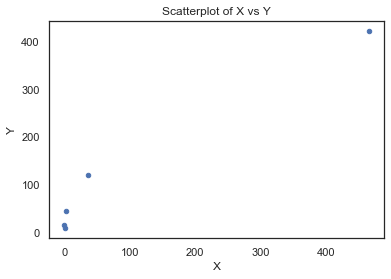

In [79]:
# Does that make sense?
# How are the independent and dependent variables related?
df = pd.DataFrame({'X':X1,
                   'Y':Y0})

# plot of X1 vs Y (similarly we can have for X0 vs Y)
df.plot(kind='scatter', x='X', y='Y',
        title='Scatterplot of X vs Y')

In [80]:
# Correlation coefficient between 
# the independent and dependent variables

np.corrcoef(df['X'],
            df['Y'])
df.corr() 

,X,Y
X,1.000000,0.982791
Y,0.982791,1.000000


In [81]:
# Lets capture our predictions 

# model prediction
df['Pred1'] = [37.20089608 + item * 0.83821876 for item in df['X']]

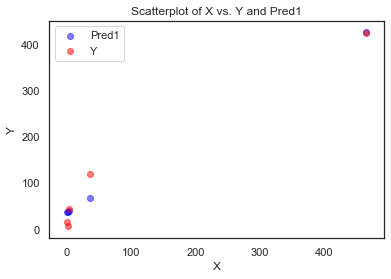

In [82]:
# parameter alpha indicates transparency, 0 (transparent) to 1 (opaque)
plt.scatter('X', 'Pred1', data=df, color='blue', alpha=0.5)
plt.scatter('X', 'Y', data=df, color='red', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatterplot of X vs. Y and Pred1')
plt.show()

In [83]:
# As the saying goes, if you ever write code more than twice, you should write a function to make it repeatable
# the function below takes a pandas DataFrame as an input and plots a heatmap of correlation between its columns 

def corr_matrix(data):
    '''
    Plots a correlation heatmap for a given dataframe
    '''
    
    sns.set(style="white")
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

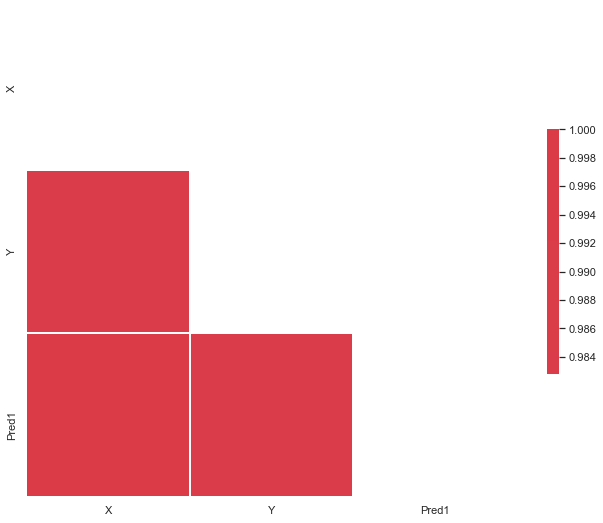

In [84]:
corr_matrix(df)

### 2. Exercise: estimating coefficients for linear regression

__(5 min.)__ Apply the techniques above to a real dataset. Estimate the coefficients for a linear regression for input value `TV` and response value `Sales`

In [85]:
# read dataset
adv = pd.read_csv('..\data\Advertising.csv')

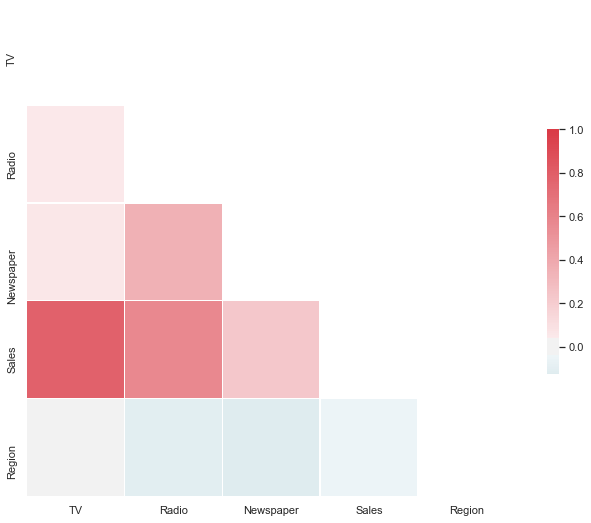

In [86]:
corr_matrix(adv)

In [87]:
X1 = adv['TV']
X0 = np.ones(200)
Y0 = adv['Sales']
X = np.matrix([X0, X1]).T
Y = np.matrix(Y0).T
beta_hat = (X.T * X).I * X.T * Y
print(beta_hat)

[[7.03259355]
 [0.04753664]]


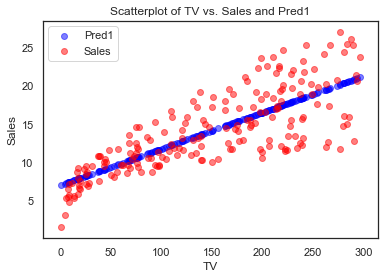

In [88]:
# Lets capture our predictions 
adv['Pred1'] = [7.03259355 + item*0.04753664 for item in adv['TV']] # model prediction
plt.scatter('TV', 'Pred1', data=adv, color='blue', alpha=0.5)
plt.scatter('TV', 'Sales', data=adv, color='red', alpha=0.5)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.title('Scatterplot of TV vs. Sales and Pred1')
plt.show()
# adv.plot(kind='scatter', x='TV', y='Sales',title='Scatterplot of TV vs Sales') # plot of X1 vs Y (similarly we can have for X0 vs Y)

### 3. Calculating $R^2$ and root mean squared error (RMSE)

In [89]:
# First with our dummy dataset 'df'

tss = sum([(df['Y'].mean() - df.loc[n,'Y'])**2
           for n in range(len(df))])

rss = sum([(df.loc[n,'Pred1'] - df.loc[n,'Y'])**2
           for n in range(len(df))])

r_squ = 1 - (rss / tss)

a_r_squ = (1 - ((1 - r_squ) * (len(df) - 1) 
           / (len(df) - 2 - 1)))

rmse = np.sqrt(np.mean([(df.loc[n, 'Pred1']
                         - df.loc[n, 'Y'])**2
                        for n in range(len(df))]
                      )
              )

print(rmse)

28.72739877755197


In [90]:
# printing with rounding off upto 3, 4 and 2 decimal places. 
print('Metrics for Pred1:')
print('r_squ   = ' + str(round(r_squ, 3)))
print('a_r_squ = ' + str(round(a_r_squ, 4)))
print('rmse    = ' + str(round(rmse, 2)))

Metrics for Pred1:
r_squ   = 0.966
a_r_squ = 0.9318
rmse    = 28.73


### 4. Exercise: evaluate our first model

__(5 min.)__ Use the advertising dataset `adv`

In [91]:
tss = sum([(adv['Sales'].mean() - adv.loc[n, 'Sales'])**2 for n in range(len(adv))]) 
rss = sum([(adv.loc[n, 'Pred1'] - adv.loc[n, 'Sales'])**2 for n in range(len(adv))])
r_squ = 1 - (rss / rss)
a_r_squ = 1 - ((1 - r_squ) * (len(adv) - 1) / (len(adv) - 2 - 1))
rmse = np.sqrt(np.mean([(adv.loc[n, 'Pred1'] - adv.loc[n, 'Sales'])**2 for n in range(len(adv))]))
print(rmse)

3.242322148654689


In [92]:
print('Metrics for Pred1:')
print('r_squ   = ' + str(round(r_squ, 3)))
print('a_r_squ = ' + str(round(a_r_squ, 4)))
print('rmse    = ' + str(round(rmse, 2)))

Metrics for Pred1:
r_squ   = 0.0
a_r_squ = -0.0102
rmse    = 3.24


### 5. Exercise: create and evaluate a new model

__(10 min.)__ How does our previous model compare to a new model that includes both the `TV` and `Newspaper` variables? Create a new model and evalute its performance.

In [93]:
X2 = adv['Newspaper']
X = np.matrix([X0, X1, X2]).T
beta_hat = (X.T * X).I * X.T * Y
print(beta_hat)

[[5.77494797]
 [0.04690121]
 [0.04421942]]


In [94]:
adv['Pred2'] = [5.77494797 + item*0.04690121 + item2*0.04421942 for item, item2 in zip(adv['TV'],adv['Newspaper'])] 

In [95]:
tss2 = sum([(adv['Sales'].mean() - adv.loc[n, 'Sales'])**2 for n in range(len(adv))]) 
rss2 = sum([(adv.loc[n, 'Pred2'] - adv.loc[n, 'Sales'])**2 for n in range(len(adv))])
r_squ2 = 1 - (rss2 / tss2)
a_r_squ2 = 1 - ((1 - R_SQU2) * (len(adv) - 1)/(len(adv) - 2 - 1))
rmse2 = np.sqrt(np.mean([(adv.loc[n,'Pred2'] - adv.loc[n,'Sales'])**2 for n in range(len(adv))]))
print(rmse2)

3.0972260265412905


### 6. Adding dummy variables

Would including `Region` in your prediction have an impact?

In [96]:
adv.groupby('Region')['Sales'].mean()

Region
1    14.023404
2    14.600000
3    13.898039
4    13.568627
Name: Sales, dtype: float64

In [97]:
# Create new variables for each region
region_dummies = pd.get_dummies(adv.Region, prefix='Region')

In [98]:
# Keep all but one of them
region_dummies = region_dummies.iloc[:, 1:]

In [99]:
# Merge your dummy variables back onto your Advertising dataset
adv = pd.concat([adv, region_dummies], axis=1)

In [100]:
# create new feature 'Area', randomly assign as 'rural' or 'suburban' or 'urban'

# random seeds ensure that results are consistant 
np.random.seed(12345)

nums = np.random.rand(len(adv))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
adv['Area'] = 'rural'
adv.loc[mask_suburban, 'Area'] = 'suburban'
adv.loc[mask_urban, 'Area'] = 'urban'

### 7. Exercise: create dummy variables

__(5 min.)__ Create dummy variables `Area_suburban` and `Area_urban`

In [101]:
# Create new variables for each area
area_dummies = pd.get_dummies(adv.Area, prefix='Area')

In [102]:
# Keep all but one of them
area_dummies = area_dummies.iloc[:, 1:]

In [103]:
# Merge your dummy variables back onto your Advertising dataset
adv = pd.concat([adv, area_dummies], axis=1)

In [104]:
adv.head()

,TV,Radio,Newspaper,Sales,Region,Pred1,Pred2,Region_2,Region_3,Region_4,Area,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,1,17.970774,19.626900,0,0,0,urban,0,1
1,44.5,39.3,45.1,10.4,1,9.147974,9.856348,0,0,0,rural,0,0
2,17.2,45.9,69.3,9.3,1,7.850224,9.646055,0,0,0,rural,0,0
3,151.5,41.3,58.5,18.5,1,14.234395,15.467317,0,0,0,rural,0,0
4,180.8,10.8,58.4,12.9,1,15.627218,16.837101,0,0,0,suburban,1,0


### 8. Final exercise: create a function for our linear regression model

__(15 min.)__ You've found that this model is successful, so you want to make it reusable for future datasets. Write a function that quickly evalutes a few different combinations of variables and records your best model.

In [105]:
def estimate_optimal_beta(df, features, target):
    """
    Parameters
    ----------
    df : pandas DataFrame
    features : list
        List of features (columns) in df to use for predictions 
    target : str
        Name of column in df to use as target variable
    
    Returns
    -------
    beta : numpy matrix
    
    """

    df['constant'] = 1
    features.insert(0, 'constant')
    
    X = np.matrix(df[features])
    Y = np.matrix(df[target])
    
    beta = (X.T * X).I * X.T * Y
    
    return beta

In [106]:
beta = estimate_optimal_beta(adv, ['TV','Radio','Newspaper','Region_2', 'Region_3', 'Region_4'], ['Sales'])

In [107]:
def make_lr_predictions(df, features, coefficients):
    """
    Parameters
    ----------
    df : pandas DataFrame
    features : list
        List of features (columns) in df to use for predictions 
    coefs : numpy matrix
        Coefficients calculated in estimate_optimal_lr_coefficients()
    
    Returns
    -------
    preds : list
    
    """
    
    df['constant'] = 1
    features.insert(0, 'constant')
    
    preds = []
    for n in range(len(df)):
        value = 0
        for num, item in enumerate(features):
            value += df.loc[n, item] * beta.tolist()[num][0]
        preds.append(value)
        
    return preds

In [108]:
preds3 = make_lr_predictions(adv, ['TV','Radio','Newspaper','Region_2', 'Region_3', 'Region_4'], beta)
adv['pred3'] = preds3

In [109]:
def evaluate_lr_predictions(df, target, pred_column_name):
    """
    Parameters
    ----------
    df : pandas DataFrame
    target : str
    pred_column_name : str
    
    Returns
    -------
    r_squ, rmse : float, float
    
    """
    
    tss = sum([(df[target].mean() - df.loc[n, target])**2 for n in range(len(df))])[0]
    rss = sum([(df.loc[n, pred_column_name] - df.loc[n, target])**2 for n in range(len(df))])[0]
    r_squ = 1 - (rss / tss)
    rmse = np.sqrt(np.mean([(df.loc[n, pred_column_name] - df.loc[n, target])**2 for n in range(len(df))]))
    
    return r_squ, rmse

In [110]:
r_squ3, rmse3 = evaluate_lr_predictions(adv, ['Sales'], 'pred3')
print(r_squ3, rmse3)

0.8994897715572078 1.6499679669179734


### 9. Reference
- [Regression](https://en.wikipedia.org/wiki/Regression_analysis) 
- [seaborn plots](https://pypi.org/project/seaborn/) 
- [scikit_learn](http://scikit-learn.org/stable/) 
- [scatter plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Mean square error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)